# 实现线性回归

[Link](https://zh-v2.d2l.ai/chapter_linear-networks/linear-regression-scratch.html#sec-linear-scratch)

首先生成数据集

In [22]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def Synthetic_data(w, b, num_examples): #@save
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = Synthetic_data(true_w, true_b, 1000)

features: tensor([0.3294, 0.6452]) 
label: tensor([2.6847])


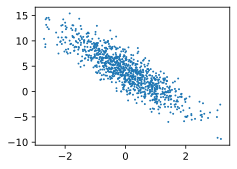

In [23]:
print('features:', features[0],'\nlabel:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [24]:
# 读取数据集
## 并生成 batch_size 大小的 mini-batch，余下不整除的部分自成一批
def Data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    # So it will read the data in a shuffled sequence
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [25]:
batch_size = 10

for X, y in Data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2305,  1.4185],
        [-1.1151,  0.0142],
        [ 0.3260,  1.6573],
        [-1.5161, -0.0243],
        [-2.3511, -0.1461],
        [-0.6721,  0.9947],
        [ 0.8904, -1.2196],
        [-0.1832, -0.0650],
        [ 1.7107, -0.3687],
        [ 0.4924,  0.1329]]) 
 tensor([[-0.1625],
        [ 1.9301],
        [-0.7796],
        [ 1.2353],
        [ 0.0165],
        [-0.5132],
        [10.1219],
        [ 4.0667],
        [ 8.8851],
        [ 4.7505]])


In [36]:
# Init the parameters of the model
## We use mini-batch to train the model
omega = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
# omega = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [27]:
def Linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

def Squared_loss(y_hat, y):
    """均方损失函数"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [28]:
def sgd(params, lr, batch_size): #@save
    """小批量梯度下降"""
    with torch.no_grad():
        for param in params:
            # 因为 params 是 w 和 b，在计算这些的时候不想被追踪，所以套在 with torch.no_grad(): 里面
            param -= lr * param.grad / batch_size
            param.grad.zero_() # 这一批算完了，后面是下一批，所以归零

In [34]:
lr = 0.03
num_epochs = 3
net = Linreg
loss = Squared_loss

for epoch in range(num_epochs):
    for X, y in Data_iter(batch_size, features, labels):
        l = loss(net(X, omega, b), y) # The loss of this batch
        
        l.sum().backward() # l is a vector output
        sgd([omega, b], lr, batch_size)
        
    with torch.no_grad():
        train_l = loss(net(features, omega, b), labels)
        print(f'epoch {epoch + 1}, loss {train_l.mean():f}')

epoch 1, loss 0.044907
epoch 2, loss 0.000179
epoch 3, loss 0.000051


In [35]:
print(f'w的估计误差: {true_w - omega.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0001,  0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0007], grad_fn=<RsubBackward1>)
